# Data Vis

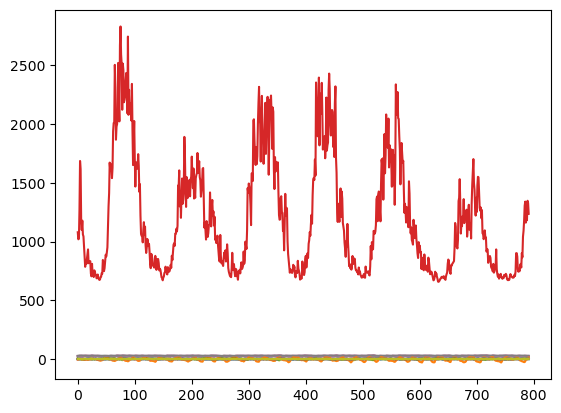

In [2]:
import matplotlib.pyplot as plt 
import numpy as np

data = np.loadtxt(f"../data/indices_ocean_19_timeseries.csv", delimiter=',', dtype=str, skiprows=1)
data = data[:,1:].astype(np.float32)

for i in range(data.shape[1]):
    plt.plot(data[:,i])
plt.show()

In [7]:
np.where(data[0]>500
         )

(array([13]),)

In [10]:
def normalize(series, original_mean, original_std):
    return (series - original_mean) / original_std
def inverse_normalize(scaled_series, original_mean, original_std):
    return scaled_series * original_std + original_mean

X = data.T 
original_mean = np.mean(X, 1, keepdims=True)
original_std =  np.std(X, 1, keepdims=True)
print(original_mean.shape, original_std.shape)
X_norm = normalize(X, original_mean, original_std)
X_norm_inv = inverse_normalize(X_norm, original_mean, original_std)
print(np.min(X_norm),np.max(X_norm))
print(np.mean(np.abs(X - X_norm_inv)))
print(X_norm.shape)

(19, 1) (19, 1)
-4.4387674 4.0859537
1.8410525e-08
(19, 792)


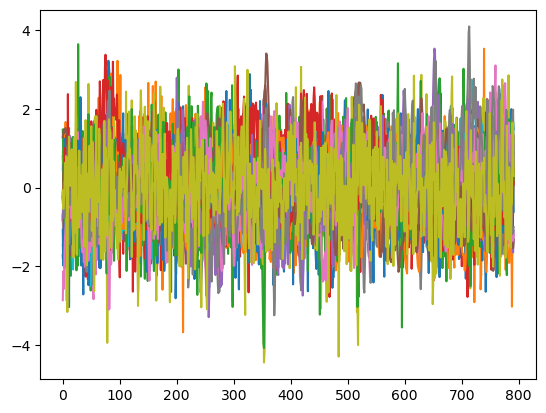

In [4]:
for i in range(X_norm.shape[0]):
    plt.plot(X_norm[i])
plt.show()

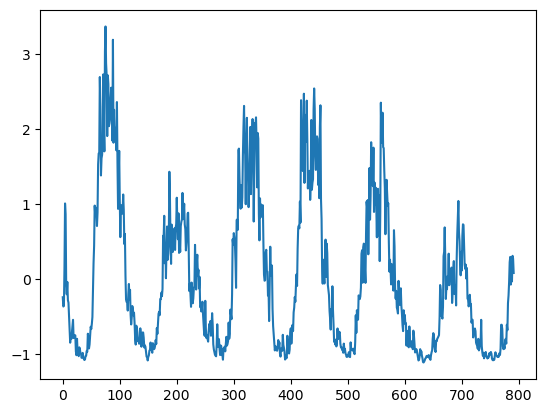

In [11]:
plt.plot(X_norm[13])

In [5]:
def normalize(series, original_max, original_min):
    return (series - original_min) / (original_max - original_min)
def inverse_normalize(scaled_series, original_max, original_min):
    return scaled_series * (original_max-original_min) + original_min

X = data.T 
original_max = np.max(X, 1, keepdims=True)
original_min =  np.min(X, 1, keepdims=True) 
X_norm = normalize(X, original_max, original_min)
X_norm_inv = inverse_normalize(X_norm, original_max, original_min)
print(np.min(X_norm),np.max(X_norm))
print(np.mean(np.abs(X - X_norm_inv)))
print(X_norm.shape)

0.0 1.0
1.1983097e-07
(19, 792)


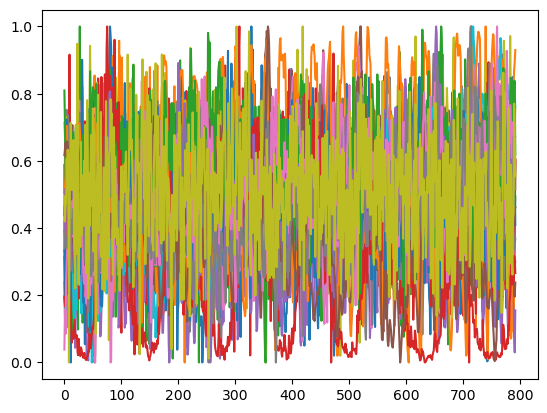

In [6]:
for i in range(X_norm.shape[0]):
    plt.plot(X_norm[i])
plt.show()

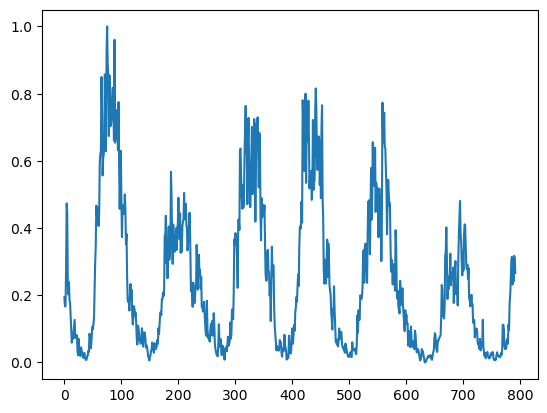

In [9]:
plt.plot(X_norm[13])

# Result Vis

In [17]:
import random 
test_pred = np.load('./results/2024-10-23 20:15:12.182310/test_pred.npy')
test_true = np.load('./results/2024-10-23 20:15:12.182310/test_true.npy')

test_pred = test_pred.reshape(test_pred.shape[0], test_pred.shape[1])
test_true = test_true.reshape(test_pred.shape[0], test_pred.shape[1])

random_id = random.sample(range(test_pred.shape[0]), 10)
colors = plt.get_cmap('tab10').colors
for i in range(len(random_id)):
    plt.plot(test_true[random_id[i]],color=colors[i])
    plt.plot(test_pred[random_id[i]], '--',color=colors[i])

IndexError: tuple index out of range